# **OPTICS Algorithm**

Ordering Points to Identify the Clustering Structure (OPTICS) is a Clustering Algorithm which locates region of high density that are seperated from one another by regions of low density.

For using this library in Python this comes under Scikit Learn Library.

## Parameters:	
**Reachability Distance** -It is defined with respect to another data point q(Let). The Reachability distance between a point p and q is the maximum of the Core Distance of p and the Euclidean Distance(or some other distance metric) between p and q. Note that The Reachability Distance is not defined if q is not a Core point.<br><br>
**Core Distance** – It is the minimum value of radius required to classify a given point as a core point. If the given point is not a Core point, then it’s Core Distance is undefined.

## OPTICS Pointers
<ol>
  <li>Produces a special order of the database with respect to its density-based clustering structure.This cluster-ordering contains info equivalent to the density-based clustering corresponding to a broad range of parameter settings.</li>
  <li>Good for both automatic and interactive cluster analysis, including finding intrinsic clustering structure</li>
  <li>Can be represented graphically or using visualization technique</li>
</ol>  


In this file , we will showcase how a basic OPTICS Algorithm works in Python , on a randomly created Dataset.

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt #Used for plotting graphs
from sklearn.datasets import make_blobs #Used for creating random dataset
from sklearn.cluster import OPTICS #OPTICS is provided under Scikit-Learn Extra
from sklearn.metrics import silhouette_score #silhouette score for checking accuracy
import numpy as np 
import pandas as pd

## Generating Data

In [9]:
data, clusters = make_blobs(
    n_samples=800, centers=4, cluster_std=0.3, random_state=0
)

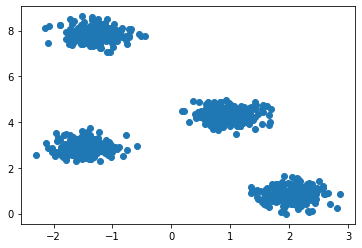

In [10]:
# Originally created plot with data
plt.scatter(data[:,0], data[:,1])
plt.show()

## Model Creation

In [20]:
# Creating OPTICS Model
optics_model = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05) 
#min_samples : The number of samples in a neighborhood for a point to be considered as a core point. 
#xi : Determines the minimum steepness on the reachability plot that constitutes a cluster boundary
#min_cluster_size : Minimum number of samples in an OPTICS cluster, expressed as an absolute number or a fraction of the number of samples

In [21]:
pred =optics_model.fit(data) #Fitting the data

In [22]:
optics_labels = optics_model.labels_ #storing labels predicted by our model

In [25]:
no_clusters = len(np.unique(optics_labels) ) #determining the no. of unique clusters and noise our model predicted
no_noise = np.sum(np.array(optics_labels) == -1, axis=0)

## Plotting our observations

In [26]:
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 4
Estimated no. of noise points: 0


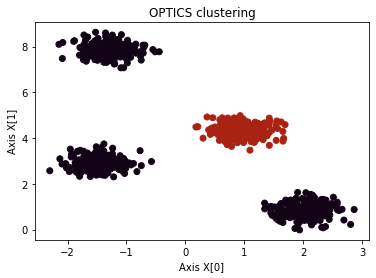

In [41]:
colors = list(map(lambda x: '#aa2211' if x == 1 else '#120416', optics_labels))
plt.scatter(data[:,0], data[:,1], c=colors, marker="o", picker=True)
plt.title(f'OPTICS clustering')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

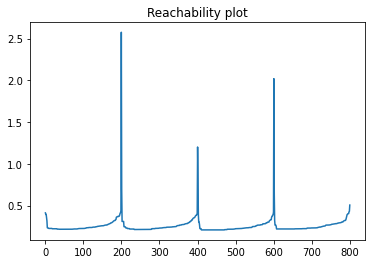

In [38]:
# Generate reachability plot , this helps understand the working of our Model in OPTICS
reachability = optics_model.reachability_[optics_model.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()

## Accuracy of OPTICS Clustering

In [37]:
OPTICS_score = silhouette_score(data, optics_labels)
OPTICS_score

0.8404988091744815

On this randomly created dataset we got an accuracy of 84.04 %

### Hence , we can see the implementation of OPTICS Clustering Algorithm on a randomly created Dataset .As we can observe from our result . the score which we got is around 84% , which is really good for a unsupervised learning algorithm.However , this accuracy definitely comes with the additonal cost of higher computational power

## Thanks a lot!